<h1>Import Libraries</h1>

In [1]:
import pandas as pd
import numpy as np

<h1>Import data and selecting features</h1>

<h3> Importing data</h3>

In [2]:
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)
loan_data_target_test = pd.read_csv('loan_data_target_test.csv', index_col = 0)
target_train = pd.read_csv('loan_data_target_train.csv', index_col = 0)

<h3>Selecting features</h3>

In [3]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[:, ['grade:A', 'grade:B','grade:C', 'grade:D', 'grade:E', 'grade:F', 'grade:G',
                                                           'home_ownership:RENT_OTHER_NONE_ANY',
                                                           'home_ownership:OWN','home_ownership:MORTGAGE','addr_state:ND_NE_IA_NV_FL_HI_AL_NM',
                                                           'addr_state:KY_MO', 'addr_state:VA_UT', 'addr_state:NC_MD',
                                                           'addr_state:NJ_OK_LA_MI_AZ_MN', 'addr_state:AR_TN_OH',
                                                           'addr_state:DE_PA', 'addr_state:WA_MA', 'addr_state:DE_PA_IN',
                                                           'addr_state:GA_OR', 'addr_state:WA_MA_RI', 'addr_state:WI_SD',
                                                           'addr_state:CT_KS_IL', 'addr_state:CO_MT_SC',
                                                           'addr_state:VT_AK_NH', 'addr_state:WY_WV_MS_DC_ME_ID','addr_state:NY','addr_state:CA', 
                                                           'sub_grade;As', 'sub_grade;Bs', 'sub_grade;Cs', 'sub_grade;Ds',
                                                           'sub_grade;Es', 'sub_grade;Fs', 'sub_grade;Gs','term:36',
                                                           'term:60', 'mths_since_issue_d:<38',
                                                           'mths_since_issue_d:38-39', 'mths_since_issue_d:40-41',
                                                           'mths_since_issue_d:42-48', 'mths_since_issue_d:49-52',
                                                           'mths_since_issue_d:53-64', 'mths_since_issue_d:65-84',
                                                           'mths_since_issue_d:>84','int_rate:<9.548',
                                                           'int_rate:9.548-12.025', 'int_rate:12.025-15.74',
                                                           'int_rate:15.74-20.281', 'int_rate:> 20.281', 'annual_inc:<20k', 'annual_inc:20k:30k',
                                                           'annual_inc:30k:40k', 'annual_inc:40k:50k', 'annual_inc:50k:60k',
                                                           'annual_inc:60k:70k', 'annual_inc:70k:80k', 'annual_inc:80k:90k',
                                                           'annual_inc:90k:100k', 'annual_inc:100k:120k',
                                                           'annual_inc:120k:140k', 'annual_inc:>140k','mths_since_last_delinq:missing_values',
                                                           'mths_since_last_delinq:0-3', 'mths_since_last_delinq:4-30',
                                                           'mths_since_last_delinq:31-56', 'mths_since_last_delinq:>=57']]

In [4]:
ref_cat = ['grade:G', 'home_ownership:RENT_OTHER_NONE_ANY', 
           'addr_state:ND_NE_IA_NV_FL_HI_AL_NM', 'sub_grade;Gs',
           'term:60','mths_since_issue_d:>84', 'int_rate:> 20.281',
           'annual_inc:<20k',  'mths_since_last_delinq:0-3']

In [5]:
inputs_train = inputs_train_with_ref_cat.drop(ref_cat, axis = 1)

In [6]:
inputs_train.shape

(373028, 58)

In [7]:
target_train.head()

,good_bad
427211,1
206088,1
136020,1
412305,1
36159,0


In [8]:
pd.options.display.max_columns = None
loan_data_inputs_test.head()

,index,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,term_int,earliest_cr_line_date,mths_since_earliest_cr_line_date,issue_d_date,mths_since_issue_d_date,index.1,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND,addr_state:ND_NE_IA_NV_FL_HI_AL_NM,addr_state:KY_MO,addr_state:VA_UT,addr_state:NC_MD,addr_state:NJ_OK_LA_MI_AZ_MN,addr_state:AR_TN_OH,addr_state:DE_PA,addr_state:WA_MA,addr_state:DE_PA_IN,addr_state:GA_OR,addr_state:WA_MA_RI,addr_state:WI_SD,addr_state:CT_KS_IL,addr_state:CO_MT_SC,addr_state:VT_AK_NH,addr_state:WY_WV_MS_DC_ME_ID,sub_grade;As,sub_grade;Bs,sub_grade;Cs,sub_grade;Ds,sub_grade;Es,sub_grade;Fs,sub_grade;Gs,term:36,term:60,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:> 20.281,annual_inc:<20k,annual_inc:20k:30k,annual_inc:30k:40k,annual_inc:40k:50k,annual_inc:50k:6

In [9]:
loan_data_target_test.head()

,good_bad
362514,1
288564,1
213591,1
263083,1
165001,1


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [11]:
reg = LogisticRegression()

In [12]:
reg.fit(inputs_train, target_train)

C:\Users\WhamClinics 2\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [13]:
reg.intercept_

array([-0.1201972])

In [14]:
reg.coef_

array([[ 0.64530423,  0.53466584,  0.41697297,  0.3121861 ,  0.2060473 ,
         0.08734218,  0.09140964,  0.08969326, -0.01752614, -0.00775079,
         0.00221453,  0.00869333,  0.03691074,  0.11269475, -0.04633333,
        -0.03921828,  0.1015405 ,  0.12786832,  0.14106153,  0.17429272,
         0.2464762 ,  0.33767253,  0.40691893,  0.03264362, -0.00928106,
         0.64530423,  0.53466584,  0.41697297,  0.3121861 ,  0.2060473 ,
         0.08734218,  0.0535657 ,  1.66712874,  1.34416614,  1.1448819 ,
         0.8587669 ,  0.59619117,  0.28829518, -0.02740188,  0.98685194,
         0.60368334,  0.3436933 ,  0.11449725,  0.05813403,  0.06682391,
         0.13139446,  0.01991561,  0.10640683,  0.07906005,  0.03031362,
         0.13367143,  0.04495845, -0.06020725,  0.07787544,  0.09897691,
         0.17713999,  0.21406621,  0.16418544]])

In [15]:
feature_names = inputs_train.columns.values

In [16]:
data = {'feature_names': feature_names, 'coeffecients': np.transpose(reg.coef_)}

In [17]:
summary_table = pd.DataFrame(columns = ['feature_names'], data = feature_names)
summary_table['coeffecients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['intercept',reg.intercept_[0]]
summary_table = summary_table.sort_index()

In [18]:
summary_table

,feature_names,coeffecients
0,intercept,-0.120197
1,grade:A,0.645304
2,grade:B,0.534666
3,grade:C,0.416973
4,grade:D,0.312186
5,grade:E,0.206047
6,grade:F,0.087342
7,home_ownership:OWN,0.091410
8,home_ownership:MORTGAGE,0.089693
9,addr_state:KY_MO,-0.017526


<h1>Build a logistic regression model with p_value </h1>

In [19]:
# from sklearn import linear_model
# import sklearn.linear_model as lm
# import scipy.stats as stat
# class LogisticRegression_with_p_values:
    
#     def __init__(self,*args,**kwargs):
#         self.model = linear_model.LogisticRegression(*args,**kwargs)
        
#     def fit(self,X,y):
#         self.model.fit(X,y)
#         denom = (2.0 * (1.0 + np.cosh(self.model.decession_function(X))))
#         denom = np.tile(denom,(x.shape[1],1)).T
#         F_ij = np.dot((x / denom).T,X)
#         cramer_Rao = np.linalg.inv(F_ij)
#         sigma_estimates = np.sqrt(np.diagonal(cramer_Rao))
#         z_scores = self.model.coef_[0] / sigma_estimates
#         p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
#         self.coef_ = self.model.coef_
#         self.intercept_ = self.model.intercept_
#         self.p_values = p_values

In [20]:
# reg = LogisticRegression_with_p_values()

In [21]:
# reg.fit(inputs_train, target_train)

In [22]:
from sklearn.feature_selection import chi2
scores, p_values = chi2(inputs_train, target_train)

In [23]:
p_values = np.append(np.nan, np.array(p_values))

In [24]:
p_values

array([            nan, 0.00000000e+000, 4.41430494e-185, 7.69402132e-004,
       4.89406475e-221, 0.00000000e+000, 0.00000000e+000, 9.26975373e-002,
       2.25626680e-067, 5.09106713e-003, 6.80376083e-002, 6.82519711e-002,
       2.11167437e-001, 7.73152149e-001, 4.98347839e-001, 1.27914702e-001,
       2.55604268e-001, 1.97419205e-002, 8.96571821e-002, 4.82499580e-002,
       2.14412508e-010, 3.75296905e-011, 2.18728796e-006, 2.09238611e-014,
       7.36526619e-003, 4.97233201e-008, 0.00000000e+000, 4.41430494e-185,
       7.69402132e-004, 4.89406475e-221, 0.00000000e+000, 0.00000000e+000,
       1.01943981e-071, 4.50807855e-257, 1.70918650e-212, 4.62161666e-107,
       3.77850739e-062, 3.34968796e-007, 4.55494522e-267, 0.00000000e+000,
       0.00000000e+000, 1.75332037e-173, 5.31476935e-011, 0.00000000e+000,
       1.95027157e-006, 2.49043270e-030, 3.28352138e-081, 2.45397882e-119,
       4.34032421e-165, 5.88972350e-184, 6.22795452e-174, 1.48941267e-159,
       6.02276328e-104, 3

In [25]:
summary_table['p_values'] = p_values

In [26]:
summary_table

,feature_names,coeffecients,p_values
0,intercept,-0.120197,NaN
1,grade:A,0.645304,0.000000e+00
2,grade:B,0.534666,4.414305e-185
3,grade:C,0.416973,7.694021e-04
4,grade:D,0.312186,4.894065e-221
5,grade:E,0.206047,0.000000e+00
6,grade:F,0.087342,0.000000e+00
7,home_ownership:OWN,0.091410,9.269754e-02
8,home_ownership:MORTGAGE,0.089693,2.256267e-67
9,addr_state:KY_MO,-0.017526,5.091067e-03


<h1> PD model validation</h1>

<h2>Out_of_sample validation (test)</h2> 

In [27]:
inputs_test_with_ref = loan_data_inputs_test.loc[:, ['grade:A', 'grade:B','grade:C', 'grade:D', 'grade:E', 'grade:F', 'grade:G',
                                                           'home_ownership:RENT_OTHER_NONE_ANY',
                                                           'home_ownership:OWN','home_ownership:MORTGAGE','addr_state:ND_NE_IA_NV_FL_HI_AL_NM',
                                                           'addr_state:KY_MO', 'addr_state:VA_UT', 'addr_state:NC_MD',
                                                           'addr_state:NJ_OK_LA_MI_AZ_MN', 'addr_state:AR_TN_OH',
                                                           'addr_state:DE_PA', 'addr_state:WA_MA', 'addr_state:DE_PA_IN',
                                                           'addr_state:GA_OR', 'addr_state:WA_MA_RI', 'addr_state:WI_SD',
                                                           'addr_state:CT_KS_IL', 'addr_state:CO_MT_SC',
                                                           'addr_state:VT_AK_NH', 'addr_state:WY_WV_MS_DC_ME_ID','addr_state:NY','addr_state:CA', 
                                                           'sub_grade;As', 'sub_grade;Bs', 'sub_grade;Cs', 'sub_grade;Ds',
                                                           'sub_grade;Es', 'sub_grade;Fs', 'sub_grade;Gs','term:36',
                                                           'term:60', 'mths_since_issue_d:<38',
                                                           'mths_since_issue_d:38-39', 'mths_since_issue_d:40-41',
                                                           'mths_since_issue_d:42-48', 'mths_since_issue_d:49-52',
                                                           'mths_since_issue_d:53-64', 'mths_since_issue_d:65-84',
                                                           'mths_since_issue_d:>84','int_rate:<9.548',
                                                           'int_rate:9.548-12.025', 'int_rate:12.025-15.74',
                                                           'int_rate:15.74-20.281', 'int_rate:> 20.281', 'annual_inc:<20k', 'annual_inc:20k:30k',
                                                           'annual_inc:30k:40k', 'annual_inc:40k:50k', 'annual_inc:50k:60k',
                                                           'annual_inc:60k:70k', 'annual_inc:70k:80k', 'annual_inc:80k:90k',
                                                           'annual_inc:90k:100k', 'annual_inc:100k:120k',
                                                           'annual_inc:120k:140k', 'annual_inc:>140k','mths_since_last_delinq:missing_values',
                                                           'mths_since_last_delinq:0-3', 'mths_since_last_delinq:4-30',
                                                           'mths_since_last_delinq:31-56', 'mths_since_last_delinq:>=57']]

In [28]:
inputs_test = loan_data_inputs_test.loc[:, ['grade:A', 'grade:B','grade:C', 'grade:D', 'grade:E', 'grade:F', 'grade:G',
                                                           'home_ownership:RENT_OTHER_NONE_ANY',
                                                           'home_ownership:OWN','home_ownership:MORTGAGE','addr_state:ND_NE_IA_NV_FL_HI_AL_NM',
                                                           'addr_state:KY_MO', 'addr_state:VA_UT', 'addr_state:NC_MD',
                                                           'addr_state:NJ_OK_LA_MI_AZ_MN', 'addr_state:AR_TN_OH',
                                                           'addr_state:DE_PA', 'addr_state:WA_MA', 'addr_state:DE_PA_IN',
                                                           'addr_state:GA_OR', 'addr_state:WA_MA_RI', 'addr_state:WI_SD',
                                                           'addr_state:CT_KS_IL', 'addr_state:CO_MT_SC',
                                                           'addr_state:VT_AK_NH', 'addr_state:WY_WV_MS_DC_ME_ID','addr_state:NY','addr_state:CA', 
                                                           'sub_grade;As', 'sub_grade;Bs', 'sub_grade;Cs', 'sub_grade;Ds',
                                                           'sub_grade;Es', 'sub_grade;Fs', 'sub_grade;Gs','term:36',
                                                           'term:60', 'mths_since_issue_d:<38',
                                                           'mths_since_issue_d:38-39', 'mths_since_issue_d:40-41',
                                                           'mths_since_issue_d:42-48', 'mths_since_issue_d:49-52',
                                                           'mths_since_issue_d:53-64', 'mths_since_issue_d:65-84',
                                                           'mths_since_issue_d:>84','int_rate:<9.548',
                                                           'int_rate:9.548-12.025', 'int_rate:12.025-15.74',
                                                           'int_rate:15.74-20.281', 'int_rate:> 20.281', 'annual_inc:<20k', 'annual_inc:20k:30k',
                                                           'annual_inc:30k:40k', 'annual_inc:40k:50k', 'annual_inc:50k:60k',
                                                           'annual_inc:60k:70k', 'annual_inc:70k:80k', 'annual_inc:80k:90k',
                                                           'annual_inc:90k:100k', 'annual_inc:100k:120k',
                                                           'annual_inc:120k:140k', 'annual_inc:>140k','mths_since_last_delinq:missing_values',
                                                           'mths_since_last_delinq:0-3', 'mths_since_last_delinq:4-30',
                                                           'mths_since_last_delinq:31-56', 'mths_since_last_delinq:>=57']].drop(ref_cat, axis = 1)

In [29]:
y_hat_test = reg.predict(inputs_test)

In [30]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [31]:
y_hat_test_proba = reg.predict_proba(inputs_test)
y_hat_test_proba

array([[0.0654988 , 0.9345012 ],
       [0.12316364, 0.87683636],
       [0.11062182, 0.88937818],
       ...,
       [0.02429878, 0.97570122],
       [0.03694302, 0.96305698],
       [0.04390335, 0.95609665]])

In [32]:
y_hat_test_proba = y_hat_test_proba[:,1]
y_hat_test_proba

array([0.9345012 , 0.87683636, 0.88937818, ..., 0.97570122, 0.96305698,
       0.95609665])

In [33]:
loan_data_targets_test_temp = loan_data_target_test

In [34]:
loan_data_targets_test_temp = loan_data_targets_test_temp.reset_index(drop = True)

In [35]:
df_actual_predict_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)

In [36]:
df_actual_predict_probs.columns = [['loan_data_target_test', 'y_hat_test_proba']]

In [37]:
df_actual_predict_probs.index = loan_data_inputs_test.index

In [38]:
df_actual_predict_probs.head()

,loan_data_target_test,y_hat_test_proba
362514,1,0.934501
288564,1,0.876836
213591,1,0.889378
263083,1,0.960767
165001,1,0.965713


<h3> Accuracy and area under the curve</h3>

In [39]:
df_actual_predict_probs = pd.read_csv('df_actual_predict_probs', index_col = 0)

In [40]:
df_actual_predict_probs.index = loan_data_inputs_test.index
df_actual_predict_probs

,loan_data_target_test,y_hat_test_proba
362514,1,0.934501
288564,1,0.876836
213591,1,0.889378
263083,1,0.960767
165001,1,0.965713
...,...,...
115,1,0.861259
296284,1,0.976512
61777,0,0.975701
91763,1,0.963057


In [41]:
tr = 0.65
df_actual_predict_probs['y_hat_test'] = np.where(df_actual_predict_probs['y_hat_test_proba'] > tr, 1,0)

In [42]:
df_actual_predict_probs

,loan_data_target_test,y_hat_test_proba,y_hat_test
362514,1,0.934501,1
288564,1,0.876836,1
213591,1,0.889378,1
263083,1,0.960767,1
165001,1,0.965713,1
...,...,...,...
115,1,0.861259,1
296284,1,0.976512,1
61777,0,0.975701,1
91763,1,0.963057,1


In [43]:
pd.crosstab(df_actual_predict_probs['loan_data_target_test'], df_actual_predict_probs['y_hat_test'], rownames=['actual'], colnames=['predict'])

predict,0,1
actual,,
0,127,8663
1,230,84237


In [44]:
pd.crosstab(df_actual_predict_probs['loan_data_target_test'], df_actual_predict_probs['y_hat_test'], rownames=['actual'], colnames=['predict'])/df_actual_predict_probs.shape[0]

predict,0,1
actual,,
0,0.001362,0.092894
1,0.002466,0.903278


In [45]:
(pd.crosstab(df_actual_predict_probs['loan_data_target_test'], df_actual_predict_probs['y_hat_test'], rownames=['actual'], colnames=['predict'])/df_actual_predict_probs.shape[0]).iloc[1,1] +(pd.crosstab(df_actual_predict_probs['loan_data_target_test'], df_actual_predict_probs['y_hat_test'], rownames=['actual'], colnames=['predict'])/df_actual_predict_probs.shape[0]).iloc[0,0] 


0.9046398661762656

Total accuracy

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score

In [47]:
fpr, tpr, threshold = roc_curve(df_actual_predict_probs['loan_data_target_test'], df_actual_predict_probs['y_hat_test_proba'])

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

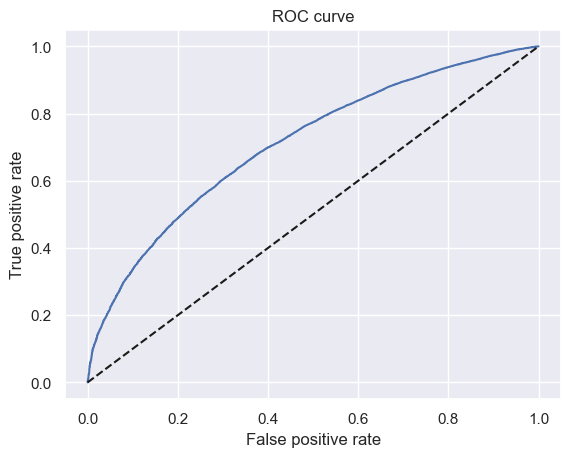

In [49]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [50]:
AUROC = roc_auc_score(df_actual_predict_probs['loan_data_target_test'], df_actual_predict_probs['y_hat_test_proba'])
AUROC

0.7102444650146641

<h2>Gini and Kolmogorov_Smirnov</h2>

In [51]:
df_actual_predict_probs = df_actual_predict_probs.sort_values(['y_hat_test_proba'])
df_actual_predict_probs

,loan_data_target_test,y_hat_test_proba,y_hat_test
10876,0,0.488400,0
2808,0,0.519075,0
18097,0,0.530963,0
29474,0,0.537928,0
9198,1,0.543618,0
...,...,...,...
258439,1,0.994039,1
258538,1,0.994134,1
258577,1,0.994316,1
258018,1,0.994565,1


In [52]:
df_actual_predict_probs = df_actual_predict_probs.reset_index()
df_actual_predict_probs

,index,loan_data_target_test,y_hat_test_proba,y_hat_test
0,10876,0,0.488400,0
1,2808,0,0.519075,0
2,18097,0,0.530963,0
3,29474,0,0.537928,0
4,9198,1,0.543618,0
...,...,...,...,...
93252,258439,1,0.994039,1
93253,258538,1,0.994134,1
93254,258577,1,0.994316,1
93255,258018,1,0.994565,1


In [53]:
df_actual_predict_probs['cumulative N population'] = df_actual_predict_probs.index + 1
df_actual_predict_probs['cumulative N good'] = df_actual_predict_probs['loan_data_target_test'].cumsum()
df_actual_predict_probs['cumulative N bad'] =df_actual_predict_probs['cumulative N population'] - df_actual_predict_probs['loan_data_target_test'].cumsum()

In [54]:
df_actual_predict_probs

,index,loan_data_target_test,y_hat_test_proba,y_hat_test,cumulative N population,cumulative N good,cumulative N bad
0,10876,0,0.488400,0,1,0,1
1,2808,0,0.519075,0,2,0,2
2,18097,0,0.530963,0,3,0,3
3,29474,0,0.537928,0,4,0,4
4,9198,1,0.543618,0,5,1,4
...,...,...,...,...,...,...,...
93252,258439,1,0.994039,1,93253,84463,8790
93253,258538,1,0.994134,1,93254,84464,8790
93254,258577,1,0.994316,1,93255,84465,8790
93255,258018,1,0.994565,1,93256,84466,8790


In [55]:
df_actual_predict_probs['cumulative perc population'] = df_actual_predict_probs['cumulative N population'] /  df_actual_predict_probs.shape[0]
df_actual_predict_probs['cumulative perc good'] = df_actual_predict_probs['cumulative N good'] / df_actual_predict_probs['loan_data_target_test'].sum()
df_actual_predict_probs['cumulative perc bad'] = df_actual_predict_probs['cumulative N bad'] / ( df_actual_predict_probs.shape[0] - df_actual_predict_probs['loan_data_target_test'].sum()) 

In [56]:
df_actual_predict_probs

,index,loan_data_target_test,y_hat_test_proba,y_hat_test,cumulative N population,cumulative N good,cumulative N bad,cumulative perc population,cumulative perc good,cumulative perc bad
0,10876,0,0.488400,0,1,0,1,0.000011,0.000000,0.000114
1,2808,0,0.519075,0,2,0,2,0.000021,0.000000,0.000228
2,18097,0,0.530963,0,3,0,3,0.000032,0.000000,0.000341
3,29474,0,0.537928,0,4,0,4,0.000043,0.000000,0.000455
4,9198,1,0.543618,0,5,1,4,0.000054,0.000012,0.000455
...,...,...,...,...,...,...,...,...,...,...
93252,258439,1,0.994039,1,93253,84463,8790,0.999957,0.999953,1.000000
93253,258538,1,0.994134,1,93254,84464,8790,0.999968,0.999964,1.000000
93254,258577,1,0.994316,1,93255,84465,8790,0.999979,0.999976,1.000000
93255,258018,1,0.994565,1,93256,84466,8790,0.999989,0.999988,1.000000


Text(0.5, 1.0, 'Gini')

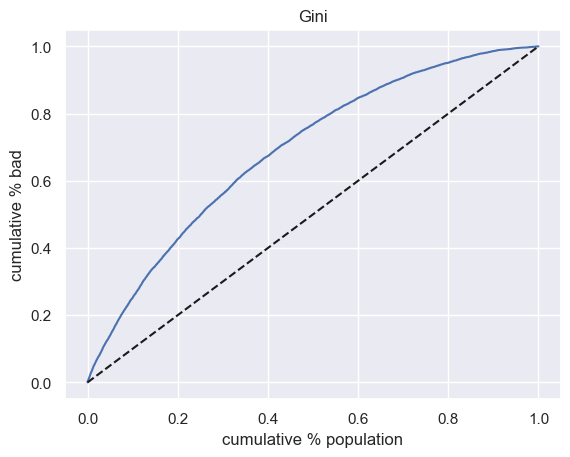

In [57]:
plt.plot(df_actual_predict_probs['cumulative perc population'], df_actual_predict_probs['cumulative perc bad'])
plt.plot(df_actual_predict_probs['cumulative perc population'], df_actual_predict_probs['cumulative perc population'] , linestyle = '--', color = 'k')
plt.ylabel('cumulative % bad')
plt.xlabel('cumulative % population')
plt.title('Gini')

In [58]:
gini = AUROC * 2 -1
gini

0.4204889300293282

Text(0.5, 1.0, 'Kolmogorov Smirnov')

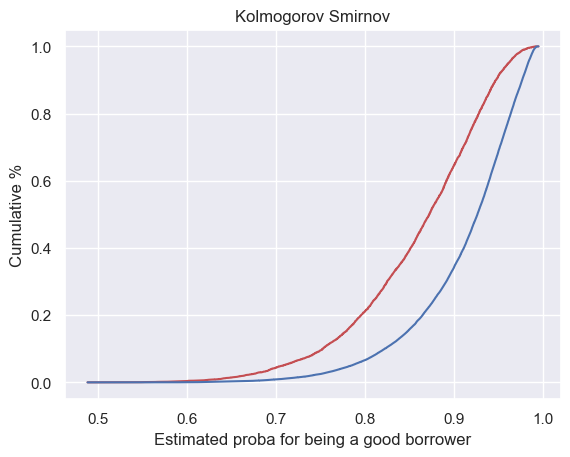

In [59]:
plt.plot( df_actual_predict_probs['y_hat_test_proba'], df_actual_predict_probs['cumulative perc bad'], color = 'r')
plt.plot(df_actual_predict_probs['y_hat_test_proba'], df_actual_predict_probs['cumulative perc good'], color = 'b')
plt.ylabel('Cumulative %')
plt.xlabel('Estimated proba for being a good borrower')
plt.title('Kolmogorov Smirnov')

In [60]:
ks = max(df_actual_predict_probs['cumulative perc bad'] - df_actual_predict_probs['cumulative perc good'])
ks

0.3046750800741525

<h3>ScoreCard</h3>

In [61]:
df_ref_catigories= pd.DataFrame(ref_cat, columns = ['feature_names'])
df_ref_catigories['coeffecients'] = 0
df_ref_catigories['p_values'] = np.nan
df_ref_catigories

,feature_names,coeffecients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL_NM,0,NaN
3,sub_grade;Gs,0,NaN
4,term:60,0,NaN
5,mths_since_issue_d:>84,0,NaN
6,int_rate:> 20.281,0,NaN
7,annual_inc:<20k,0,NaN
8,mths_since_last_delinq:0-3,0,NaN


In [62]:
df_scorecard = pd.concat([summary_table,df_ref_catigories])
df_scorecard = df_scorecard.reset_index()
df_scorecard

,index,feature_names,coeffecients,p_values
0,0,intercept,-0.120197,NaN
1,1,grade:A,0.645304,0.000000e+00
2,2,grade:B,0.534666,4.414305e-185
3,3,grade:C,0.416973,7.694021e-04
4,4,grade:D,0.312186,4.894065e-221
...,...,...,...,...
63,4,term:60,0.000000,NaN
64,5,mths_since_issue_d:>84,0.000000,NaN
65,6,int_rate:> 20.281,0.000000,NaN
66,7,annual_inc:<20k,0.000000,NaN


In [63]:
pd.options.display.max_rows = None
df_scorecard['original_feature_name'] = df_scorecard['feature_names'].str.split(':').str[0]
df_scorecard['original_feature_name'] = df_scorecard['original_feature_name'].str.split(';').str[0]
df_scorecard

,index,feature_names,coeffecients,p_values,original_feature_name
0,0,intercept,-0.120197,NaN,intercept
1,1,grade:A,0.645304,0.000000e+00,grade
2,2,grade:B,0.534666,4.414305e-185,grade
3,3,grade:C,0.416973,7.694021e-04,grade
4,4,grade:D,0.312186,4.894065e-221,grade
5,5,grade:E,0.206047,0.000000e+00,grade
6,6,grade:F,0.087342,0.000000e+00,grade
7,7,home_ownership:OWN,0.091410,9.269754e-02,home_ownership
8,8,home_ownership:MORTGAGE,0.089693,2.256267e-67,home_ownership
9,9,addr_state:KY_MO,-0.017526,5.091067e-03,addr_state


In [64]:
min_score = 300
max_score = 850

In [65]:
df_scorecard.groupby('original_feature_name')['coeffecients'].min()

original_feature_name
addr_state               -0.046333
annual_inc               -0.060207
grade                     0.000000
home_ownership            0.000000
int_rate                  0.000000
intercept                -0.120197
mths_since_issue_d       -0.027402
mths_since_last_delinq    0.000000
sub_grade                 0.000000
term                      0.000000
Name: coeffecients, dtype: float64

In [66]:
min_sum_coeff = df_scorecard.groupby('original_feature_name')['coeffecients'].min().sum()
min_sum_coeff

-0.2541396624382216

In [67]:
max_sum_coeff = df_scorecard.groupby('original_feature_name')['coeffecients'].max().sum()
max_sum_coeff

4.724023855632252

In [68]:
df_scorecard['score'] = df_scorecard['coeffecients'] * (max_score - min_score) / (max_sum_coeff - min_sum_coeff)
df_scorecard

,index,feature_names,coeffecients,p_values,original_feature_name,score
0,0,intercept,-0.120197,NaN,intercept,-13.279688
1,1,grade:A,0.645304,0.000000e+00,grade,71.294831
2,2,grade:B,0.534666,4.414305e-185,grade,59.071224
3,3,grade:C,0.416973,7.694021e-04,grade,46.068220
4,4,grade:D,0.312186,4.894065e-221,grade,34.491104
5,5,grade:E,0.206047,0.000000e+00,grade,22.764623
6,6,grade:F,0.087342,0.000000e+00,grade,9.649784
7,7,home_ownership:OWN,0.091410,9.269754e-02,home_ownership,10.099166
8,8,home_ownership:MORTGAGE,0.089693,2.256267e-67,home_ownership,9.909536
9,9,addr_state:KY_MO,-0.017526,5.091067e-03,addr_state,-1.936331


In [69]:
df_scorecard['score'][0] = ((df_scorecard['coeffecients'][0] - min_sum_coeff) / (max_sum_coeff - min_sum_coeff)) * (max_score - min_score) + 300
df_scorecard

C:\Users\WhamClinics 2\AppData\Local\Temp\ipykernel_7160\287740088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['score'][0] = ((df_scorecard['coeffecients'][0] - min_sum_coeff) / (max_sum_coeff - min_sum_coeff)) * (max_score - min_score) + 300


,index,feature_names,coeffecients,p_values,original_feature_name,score
0,0,intercept,-0.120197,NaN,intercept,314.798300
1,1,grade:A,0.645304,0.000000e+00,grade,71.294831
2,2,grade:B,0.534666,4.414305e-185,grade,59.071224
3,3,grade:C,0.416973,7.694021e-04,grade,46.068220
4,4,grade:D,0.312186,4.894065e-221,grade,34.491104
5,5,grade:E,0.206047,0.000000e+00,grade,22.764623
6,6,grade:F,0.087342,0.000000e+00,grade,9.649784
7,7,home_ownership:OWN,0.091410,9.269754e-02,home_ownership,10.099166
8,8,home_ownership:MORTGAGE,0.089693,2.256267e-67,home_ownership,9.909536
9,9,addr_state:KY_MO,-0.017526,5.091067e-03,addr_state,-1.936331


In [70]:
df_scorecard['score-preliminary'] = df_scorecard['score'].round()
df_scorecard

,index,feature_names,coeffecients,p_values,original_feature_name,score,score-preliminary
0,0,intercept,-0.120197,NaN,intercept,314.798300,315.0
1,1,grade:A,0.645304,0.000000e+00,grade,71.294831,71.0
2,2,grade:B,0.534666,4.414305e-185,grade,59.071224,59.0
3,3,grade:C,0.416973,7.694021e-04,grade,46.068220,46.0
4,4,grade:D,0.312186,4.894065e-221,grade,34.491104,34.0
5,5,grade:E,0.206047,0.000000e+00,grade,22.764623,23.0
6,6,grade:F,0.087342,0.000000e+00,grade,9.649784,10.0
7,7,home_ownership:OWN,0.091410,9.269754e-02,home_ownership,10.099166,10.0
8,8,home_ownership:MORTGAGE,0.089693,2.256267e-67,home_ownership,9.909536,10.0
9,9,addr_state:KY_MO,-0.017526,5.091067e-03,addr_state,-1.936331,-2.0


In [71]:
min_score_prel = df_scorecard.groupby('original_feature_name')['score-preliminary'].min().sum()
min_score_prel

300.0

In [72]:
max_score_prel = df_scorecard.groupby('original_feature_name')['score-preliminary'].max().sum()
max_score_prel

850.0

In [73]:
df_scorecard['score'] = df_scorecard['score-preliminary']
df_scorecard = df_scorecard.drop(['score-preliminary'], axis = 1)

In [74]:
df_scorecard

,index,feature_names,coeffecients,p_values,original_feature_name,score
0,0,intercept,-0.120197,NaN,intercept,315.0
1,1,grade:A,0.645304,0.000000e+00,grade,71.0
2,2,grade:B,0.534666,4.414305e-185,grade,59.0
3,3,grade:C,0.416973,7.694021e-04,grade,46.0
4,4,grade:D,0.312186,4.894065e-221,grade,34.0
5,5,grade:E,0.206047,0.000000e+00,grade,23.0
6,6,grade:F,0.087342,0.000000e+00,grade,10.0
7,7,home_ownership:OWN,0.091410,9.269754e-02,home_ownership,10.0
8,8,home_ownership:MORTGAGE,0.089693,2.256267e-67,home_ownership,10.0
9,9,addr_state:KY_MO,-0.017526,5.091067e-03,addr_state,-2.0


In [75]:
inputs_test_with_intercept = inputs_test_with_ref
inputs_test_with_intercept.insert(0, 'intercept', 1)

In [76]:
pd.options.display.max_rows = 10
inputs_test_with_intercept.head()

,intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL_NM,addr_state:KY_MO,addr_state:VA_UT,addr_state:NC_MD,addr_state:NJ_OK_LA_MI_AZ_MN,addr_state:AR_TN_OH,addr_state:DE_PA,addr_state:WA_MA,addr_state:DE_PA_IN,addr_state:GA_OR,addr_state:WA_MA_RI,addr_state:WI_SD,addr_state:CT_KS_IL,addr_state:CO_MT_SC,addr_state:VT_AK_NH,addr_state:WY_WV_MS_DC_ME_ID,addr_state:NY,addr_state:CA,sub_grade;As,sub_grade;Bs,sub_grade;Cs,sub_grade;Ds,sub_grade;Es,sub_grade;Fs,sub_grade;Gs,term:36,term:60,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:> 20.281,annual_inc:<20k,annual_inc:20k:30k,annual_inc:30k:40k,annual_inc:40k:50k,annual_inc:50k:60k,annual_inc:60k:70k,annual_inc:70k:80k,annual_inc:80k:90k,annual_inc:90k:100k,annual_inc:100k:120k,annual_inc:120k:140k,annual_inc:>140k,mths_since_last_delinq:missing_values,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57
362514,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0
288564,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0
213591,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0
263083,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0
165001,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0


In [77]:
inputs_test_with_intercept = inputs_test_with_intercept[df_scorecard['feature_names'].values]
inputs_test_with_intercept.head()

,intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:KY_MO,addr_state:VA_UT,addr_state:NC_MD,addr_state:NJ_OK_LA_MI_AZ_MN,addr_state:AR_TN_OH,addr_state:DE_PA,addr_state:WA_MA,addr_state:DE_PA_IN,addr_state:GA_OR,addr_state:WA_MA_RI,addr_state:WI_SD,addr_state:CT_KS_IL,addr_state:CO_MT_SC,addr_state:VT_AK_NH,addr_state:WY_WV_MS_DC_ME_ID,addr_state:NY,addr_state:CA,sub_grade;As,sub_grade;Bs,sub_grade;Cs,sub_grade;Ds,sub_grade;Es,sub_grade;Fs,term:36,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,annual_inc:20k:30k,annual_inc:30k:40k,annual_inc:40k:50k,annual_inc:50k:60k,annual_inc:60k:70k,annual_inc:70k:80k,annual_inc:80k:90k,annual_inc:90k:100k,annual_inc:100k:120k,annual_inc:120k:140k,annual_inc:>140k,mths_since_last_delinq:missing_values,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL_NM,sub_grade;Gs,term:60,mths_since_issue_d:>84,int_rate:> 20.281,annual_inc:<20k,mths_since_last_delinq:0-3
362514,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
288564,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
213591,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
263083,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
165001,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [78]:
scorecard_score = df_scorecard['score']

In [79]:
inputs_test_with_intercept.shape

(93257, 68)

In [80]:
scorecard_score.shape

(68,)

In [81]:
scorecard_score = scorecard_score.values.reshape(68,1)
scorecard_score.shape

(68, 1)

In [82]:
y_score = inputs_test_with_intercept.dot(scorecard_score)
y_score.head()

,0
362514,621.0
288564,546.0
213591,559.0
263083,681.0
165001,697.0


<h2>Setting cut-offs</h2>

In [83]:
df_cutoffs = pd.concat([pd.DataFrame(fpr), pd.DataFrame(tpr), pd.DataFrame(threshold)], axis = 1)

In [84]:
df_cutoffs.columns = ['fpr', 'tpr', 'thresholds']
df_cutoffs

,fpr,tpr,thresholds
0,0.000000,0.000000,1.994635
1,0.000000,0.000012,0.994635
2,0.000000,0.000059,0.994039
3,0.000000,0.000095,0.993816
4,0.000000,0.000166,0.993334
...,...,...,...
30360,0.999431,0.999976,0.549717
30361,0.999431,0.999988,0.548768
30362,0.999545,0.999988,0.545919
30363,0.999545,1.000000,0.543618


In [85]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10,16)

In [86]:
df_cutoffs['score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coeff) * ((max_score - min_score) / (max_sum_coeff - min_sum_coeff))) + min_score  
df_cutoffs['score'] = df_cutoffs['score'].round()
df_cutoffs.head()

,fpr,tpr,thresholds,score
0,0.0,0.000000,1.000000,2687.0
1,0.0,0.000012,0.994635,905.0
2,0.0,0.000059,0.994039,893.0
3,0.0,0.000095,0.993816,889.0
4,0.0,0.000166,0.993334,881.0


In [87]:
df_cutoffs['score'][df_cutoffs['score'] > max_score] = max_score
df_cutoffs

,fpr,tpr,thresholds,score
0,0.000000,0.000000,1.000000,850.0
1,0.000000,0.000012,0.994635,850.0
2,0.000000,0.000059,0.994039,850.0
3,0.000000,0.000095,0.993816,850.0
4,0.000000,0.000166,0.993334,850.0
...,...,...,...,...
30360,0.999431,0.999976,0.549717,350.0
30361,0.999431,0.999988,0.548768,350.0
30362,0.999545,0.999988,0.545919,348.0
30363,0.999545,1.000000,0.543618,347.0


In [88]:
def n_approved(p):
    return np.where(df_actual_predict_probs['y_hat_test_proba'] > p, 1, 0).sum()

In [89]:
df_cutoffs['n_approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['n_rejected'] = df_actual_predict_probs['y_hat_test_proba'].shape[0] - df_cutoffs['n_approved']
df_cutoffs['approval_rate'] = df_cutoffs['n_approved'] / df_actual_predict_probs['y_hat_test_proba'].shape[0] 

In [90]:
df_cutoffs

,fpr,tpr,thresholds,score,n_approved,n_rejected,approval_rate
0,0.000000,0.000000,1.000000,850.0,0,93257,0.000000
1,0.000000,0.000012,0.994635,850.0,0,93257,0.000000
2,0.000000,0.000059,0.994039,850.0,4,93253,0.000043
3,0.000000,0.000095,0.993816,850.0,5,93252,0.000054
4,0.000000,0.000166,0.993334,850.0,13,93244,0.000139
...,...,...,...,...,...,...,...
30360,0.999431,0.999976,0.549717,350.0,93249,8,0.999914
30361,0.999431,0.999988,0.548768,350.0,93250,7,0.999925
30362,0.999545,0.999988,0.545919,348.0,93251,6,0.999936
30363,0.999545,1.000000,0.543618,347.0,93252,5,0.999946


In [91]:
df_cutoffs[df_cutoffs['thresholds'] >= .90].tail()

,fpr,tpr,thresholds,score,n_approved,n_rejected,approval_rate
18054,0.353015,0.656209,0.900028,571.0,58530,34727,0.627620
18055,0.353015,0.656292,0.900016,571.0,58537,34720,0.627696
18056,0.353015,0.656315,0.900010,571.0,58538,34719,0.627706
18057,0.353015,0.656327,0.900009,571.0,58540,34717,0.627728
18058,0.353015,0.656363,0.900007,571.0,58541,34716,0.627738
